In [1]:
import numpy as np

In [2]:
from langdetect import detect as detect_language

In [3]:
from collections import Counter

In [46]:
import re
import string

exclude = set(string.punctuation)
exclude.remove("'")
exclude.remove(".")
exclude.remove(",")
exclude.remove("!")
exclude.remove("-")

special_types = exclude

In [47]:
import glob
paths = glob.glob("rap_lyrics/*/*.txt") + glob.glob("rap_lyrics/*.txt")
len(paths)

76898

In [211]:
MAX_WORDS = 16

In [94]:
import re

def parse_text(s):
    out = unicode(s)
    for st in special_types:
        out = out.replace(st, u" ")
    out = re.sub(',',' , ', out)
    
    out = re.sub("\."," \. ", out)
    out = re.sub("!"," ! ", out)
    out = re.sub("-"," - ", out)
    out = re.sub("'+($|\s)"," ", out)
    out = re.sub("(^|\s)'+", " ", out)
    out = re.sub("(^|\s)'+($|\s)", " ", out)
    out = re.sub(r'(.)\1{3,}', r'\1\1', out)
    out = re.sub(r'\.',' ', out)
#     out = re.sub(r"\'s", " \'s", out)
#     out = re.sub(r"\'ve", " \'ve", out)
#     out = re.sub(r"n\'t", " n\'t", out)
#     out = re.sub(r"\'re", " \'re", out)
#     out = re.sub(r"\'d", " \'d", out)
#     out = re.sub(r"\'ll", " \'ll", out)
    
    s.encode("ascii")
    
    arr = []
    for c in out:
        
        if c in exclude:
            arr.append("")
            continue
        arr.append(c)
    return "".join(arr).strip().lower()

print(parse_text("\t'rollin' hater's boooooooiiii hello.hello,hello!hello-hello gangsta' 'gangsta 519 ...''' "))

rollin hater's booii hello   hello , hello ! hello - hello gangsta gangsta 519


In [95]:
import numpy as np
from tqdm import tqdm

word_counter = Counter()

count = 0
skipped = 0

bad_starts = set(["chorus", "dj","talk", "applause", "refrain", "intro", "outro", "bridge", "corrections"])

cleaned_paras = []

for m in tqdm(paths):
    l = open(m).read()
    for para in l.split("\n\n")[1:]:
        lines = para.split("\n")
        first_line = lines[0].lower()
        
        try:
            para.encode("ascii")
        except:
            continue
        
        if len(lines) < 5:
            continue
            
        if np.mean([len(l) for l in lines[1:]]) < 30:
            continue
        
        if any([(bs in first_line) for bs in bad_starts]):
            skipped += 1
            continue
            
        #if len(set(lines)) < len(lines):
        #    continue
            
        try:
            if detect_language(para) != "en":
                continue
#             languages = [detect_language(l) == "en" for l in lines[1:]]
#             if np.mean(languages) < 0.666:
#                 continue
        except Exception:
            continue
            
        out_lines = []
            
        for line in lines:
            words = parse_text(line.lower()).split()
            word_counter.update(words)
            out_lines.append(" ".join(words))
        cleaned_paras.append(" [lb] ".join(out_lines))
    count += 1
    #if count > 10000:
    #    break

100%|██████████| 76898/76898 [17:32<00:00, 73.07it/s]


# Searching for mediocre rhymes

In [746]:
cleaned_paras = json.load(open('cleaned_paras.json'))
print(len(cleaned_paras))

cleaned_paras2 = []

for cp in cleaned_paras:
    lines = cp.split(' [lb] ')
    first_line = 0
    for l in lines:
        if len(l.split()) < 5:
            first_line += 1
#         elif "verse" in l:
#             first_line += 1
        else:
            break
            
    last_line = len(lines) - 1
    for i in range(len(lines)):
        if len(lines[len(lines) - 1 - i].split()) < 5:
            last_line -= 1
        else:
            break
    
    if last_line - first_line < 3:
        
#         print(cp)
#         print(lines, first_line, last_line)
#         break
        continue
    
    cleaned_paras2.append(' [lb] '.join(lines[first_line:last_line + 1])  + " [vb]")
len(cleaned_paras2)

233690


232461

In [541]:
cleaned_paras2[1]

u"watch yo back motherfucker , king syze the hurricane [lb] street gentleman with a well - deserved name [lb] i'm hot i burn flame , you not you cold rain [lb] hip - hop's my first name , this rap's my last days [lb] i spit the worst pain , the pressure will burst veins [lb] my first reign way before the earth came [lb] your shit is phony , don't know me , go get your homies [lb] i'm hittin harder than jim tomey , and y'all niggaz don't know me [lb] i feel like the world owes me , gimme that [lb] i'm spittin scriptural for biblical cats , criminals with pitiful raps [lb] lyrical stats pinnacle and critical to my map [lb] check it out now nowhere i'm gonna end up , ten - hut [lb] goin long and deep , fuck drama in the streets [lb] i'm bringin karma on beats , palmin the heat [lb] only if my life's in danger [lb] come on , dog , that's a no - brainer [lb] and to this mic , man , i ain't no stranger [lb] that's why i rearrange ya , pour straight out the fuckin manger [vb]"

In [747]:
import json 
#print(len(cleaned_paras))
json.dump(cleaned_paras2, open('cleaned_paras2.json', 'w'))
cleaned_paras = json.load(open('cleaned_paras2.json'))
print(len(cleaned_paras))

232461


In [543]:
cleaned_paras[1]

u"watch yo back motherfucker , king syze the hurricane [lb] street gentleman with a well - deserved name [lb] i'm hot i burn flame , you not you cold rain [lb] hip - hop's my first name , this rap's my last days [lb] i spit the worst pain , the pressure will burst veins [lb] my first reign way before the earth came [lb] your shit is phony , don't know me , go get your homies [lb] i'm hittin harder than jim tomey , and y'all niggaz don't know me [lb] i feel like the world owes me , gimme that [lb] i'm spittin scriptural for biblical cats , criminals with pitiful raps [lb] lyrical stats pinnacle and critical to my map [lb] check it out now nowhere i'm gonna end up , ten - hut [lb] goin long and deep , fuck drama in the streets [lb] i'm bringin karma on beats , palmin the heat [lb] only if my life's in danger [lb] come on , dog , that's a no - brainer [lb] and to this mic , man , i ain't no stranger [lb] that's why i rearrange ya , pour straight out the fuckin manger [vb]"

In [2]:
ending_dict = json.load(open('ending_dict.json', 'r'))

last_ending = None
last_line = None

counter = 0
all_counter = 0

for cp in cleaned_paras: #[34:35]:
    
    for line in cp.split(' [lb] '):
        split = line.split()
        if len(split) == 0:
            continue
        last_word = split[-1]
        if ending_dict.get(last_word, None) is not None and \
            last_ending is not None and \
            last_word != last_ending and \
            ending_dict.get(last_word) == ending_dict.get(last_ending):
                counter += 1
#                 print(last_line)
#                 print(line)
#                 print(last_word)
#                 print(last_ending)
#                 print()
                
        last_ending = last_word
        last_line = line
        all_counter += 1

counter / float(all_counter)

0.0846350039951255

In [544]:
from collections import Counter

word_counter = Counter()

for cp in cleaned_paras:
    word_counter.update(cp.split())
#print(cleaned_paras[4500].replace(' [lb] ', '\n'))

rare_ranks = dict(zip([x[0] for x in word_counter.most_common()], range(len(word_counter))))

In [547]:
rare_ranks['[lb]']

0

In [548]:
len(rare_ranks)

184950

In [556]:
json.dump(word_to_index, open('word_to_index_v5.json', 'w'))

In [684]:
large_embedding_matrix = np.zeros((len(rare_ranks) + 1, EMBEDDING_SIZE), dtype=np.float32)
word_to_index = {"[unk]" : 0}
large_embedding_matrix[0] = np.random.normal(size = (EMBEDDING_SIZE))
 
bad_words = []

for word, idx in rare_ranks.items():
    if word in embedding_vectors:
        large_embedding_matrix[idx + 1] = embedding_vectors[word]
        word_to_index[word] = idx + 1
    elif "'" in word and word.replace("'", "") in embedding_vectors:
        large_embedding_matrix[idx + 1] = embedding_vectors[word.replace("'", "")]
        word_to_index[word] = idx + 1
    elif idx > 15000:
        #map rare unknown words to "[unk]"
        word_to_index[word] = 0
        bad_words.append(word)
    else:
        large_embedding_matrix[idx + 1] = np.random.normal(size = (EMBEDDING_SIZE))
        word_to_index[word] = idx + 1
        bad_words.append(word)

In [749]:
import numpy as np

n = 5000
top_words = set([x[0] for x in word_counter.most_common(n)])

in_vocab_scores = []

for cp in cleaned_paras:
    in_vocab = []
    for w in cp.split():
        if word_to_index[w] != 0 and word_to_index[w] < n:
            in_vocab.append(True)
        else:
            in_vocab.append(False)
    in_vocab_scores.append(np.mean(in_vocab))

In [750]:
sorted_ranks = np.argsort(in_vocab_scores)

print(cleaned_paras[sorted_ranks[10]])
print()
print(cleaned_paras[sorted_ranks[-40000]])

cale's crafty , consistently creative [lb] constantly consciously communicative [lb] commanding , careful concentration [lb] causing consequential complications [lb] calamity , chaos , confusion [lb] cataclysmic , climactic conclusions [lb] cleverly contrived , classified content [lb] chronicled courtesy continuous comments [lb] conveying , crystal - clear conviction [lb] comprehensible , comfortable conditions [lb] crusading cross - country competently [lb] consulting compasses confidently [lb] castaway carrying confidential [lb] combos compiling cardinal credentials [lb] caliber , counter clockwise calendar [lb] combating carnivore , cannibal challengers [lb] arranging articulate alliances [lb] alphabetical , audible appliances [lb] above - average , atypical anomaly [lb] athletically abnormal anatomically [lb] agile , acrobatically advanced [lb] absolutely annihilating anyone against [lb] appreciated , around and abroad [lb] attentive audiences automatically applaud [lb] acknowledgi

In [562]:
np.mean(in_vocab_scores)

0.97444177256917341

In [579]:
len(cleaned_paras)

233315

In [689]:
for w in cleaned_paras[sorted_ranks[-20000]].split():
    if word_to_index[w] != 0 and word_to_index[w] < 5000:
        out = w
    else:
        out = "<<%s>>"%w
    print(out, end = " ")

that time when i saw ya i thought , wow , so [lb] check out the skirt on that , now straight to the bar - <<tequila>> , lemon , salt [lb] i give her the all clear , letting her know green light , letting her go [lb] dropped her from a mile away , thought to myself , why not give it a go [vb] 

In [44]:
VOCAB_SIZE = 5000

In [751]:
all_lines = []

words = []

for r in np.random.permutation(sorted_ranks[-70000:]):
    cp = cleaned_paras[r]
    for w in cp.split():
        words.append(w)
#         if w in top_words:
#             words.append(w)
#         else:
#             words.append("[UNK]")
            
    #words.append('[lb]')
            
text = " ".join(words)
len(text)

42389926

In [737]:
for cp in cleaned_paras:
    if 'verse 1' in cp:
        print(cp)
        break

verse 1 true - asia [lb] this be that brook - nam style to the 22nd psalm [lb] the walk has been long but still remain strong [lb] trials and tribulation try to leave my brain scattered [lb] i've been bruised and battered , abused by grammar [lb] still don't matter , hands clapped , tears down my cheek [lb] lord i feel weak but still it's you i seek [lb] it's crazy , sometimes i get the strength of the navy [lb] other times i feel like curling up like a baby [lb] i crack open the book the bread i take daily [lb] like god fed elijah , christ will never fail me [lb] exhale relief , the holy spirit never fails to leak [lb] all glory , all hail the chief [lb] king priest , pray and never let the spirit cease [lb] there's drama all around me but still i feel at peace [lb] at least i died to the flesh living it right [lb] living this life , because i'm christ infinite wife [vb] [vb]


In [753]:
with open('rap_lyrics_5000.txt', 'w') as f:
    f.write(text)

In [754]:
'''Example script to generate text from Nietzsche's writings.
At least 20 epochs are required before the generated text
starts sounding coherent.
It is recommended to run this script on GPU, as recurrent
networks are quite computationally intensive.
If you try this script on new data, make sure your corpus
has at least ~100k characters. ~1M is better.
'''

from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding
from keras.layers import LSTM
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

text = open('rap_lyrics_5000.txt').read().lower()
print('corpus length:', len(text))

corpus length: 50149776


In [576]:
text[1000:1600]

"ng shit with that funky bitch up in that fuddruckers [lb] you best to be a mud ducker , i'm a thug bucker [lb] and i got one specially designed for all you motherfuckers [lb] we love ruckus , wanna shuck and jive [lb] but when i came through with that four to the fucking five [lb] niggas duck and dive [lb] what a fucking liar [lb] bitch ain't no time to get flossed up [lb] i'm sauced up you said it cost what woo - d [vb] i specialize in snatching vertebrae break your anatomy down to a , call [lb] me atomic sensai aka b j mckay , and his best friend bear will hit you [lb] with shirley murdock a"

In [693]:
index_to_word = dict([(v,k) for k,v in word_to_index.items()])

UNK_INDEX = word_to_index["[unk]"]
LB_INDEX = word_to_index["[lb]"]
VB_INDEX = word_to_index["[vb]"]
UNK_INDEX, LB_INDEX, VB_INDEX

(0, 1, 20)

In [755]:
text_indexes = [word_to_index[w] for w in text.split()]
text_indexes = list(reversed(text_indexes))
len(text_indexes)

# cut the text in semi-redundant sequences of maxlen characters
VOCAB_SIZE = 5000
MAX_WORDS = 16
#maxlen = 64
step = 1
sentences = []
next_words = []
for i in range(0, len(text_indexes) - MAX_WORDS, step):
    next_text = text_indexes[i: i + MAX_WORDS]
    next_word = text_indexes[i + MAX_WORDS]
    if next_word == UNK_INDEX or next_word == VB_INDEX or next_word >= VOCAB_SIZE:
        pass
    else:
        sentences.append(next_text)
        next_words.append(next_word)
print('nb sequences:', len(sentences))

nb sequences: 10480749


In [756]:
import numpy as np

X = np.array(sentences)

y = np.expand_dims(next_words, -1)

X.shape, y.shape

((10480749, 16), (10480749, 1))

In [12]:
# BATCH_SIZE = 128
# NUM_STEPS = 35
# MAX_RANK = 5000
# MAX_GRAD_NORM = 5.

# class BatchIterator:
    
#     def __init__(self, sentences, next_words, batch_size=BATCH_SIZE, num_steps=MAX_WORDS, reshuffle=False):
#         self.sentences = sentences
#         self.next_words = next_words
#         self.batch_size = batch_size
#         self.num_steps = num_steps
#         self.reshuffle = reshuffle
#         self.index = 0
        
#         self.X = np.array(sentences)
#         self.y = np.array(next_words)
        
#         self.len_text = len(sentences)
        
#     def __iter__(self):
#         return self
    
#     def reset_words(self):
#         print("resetting iterator")
#         if self.reshuffle:
#             #TODO : do something here
#             pass
#         self.index = 0
        
#     def next(self):
#         if (self.index + self.batch_size) * NUM_STEPS + 1 >= self.len_text:
#             self.reset_words()
            
#         x_ = self.X[(self.index * self.batch_size) : (self.index + 1) * self.batch_size]
        
#         y_ = np.zeros((self.batch_size, 1000), dtype=np.bool)
        
#         for i, y in enumerate(self.y[(self.index * self.batch_size) : (self.index + 1) * self.batch_size]):
#             y_[i, y] = 1
        
#         self.index += 1   
#         return x_ , y_


# from sklearn.cross_validation import train_test_split
# train_idxs, val_idxs = train_test_split(range(len(sentences)), test_size=0.33, random_state=42)
# train_iter = BatchIterator([sentences[i] for i in train_idxs], [next_words[i] for i in train_idxs])
# val_iter = BatchIterator([sentences[i] for i in val_idxs], [next_words[i] for i in val_idxs])

# x, y = train_iter.next()
# x.shape, y.shape

# x, y = train_iter.next()
# s = ' '.join([index_to_word[idx] for idx in x[0]])
# print(s)
# print(index_to_word[y[0]])

# GloVe embedding

In [ ]:
Embedding?

In [222]:
EMBEDDING_SIZE = 50 #100, 200, 300

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_SIZE), dtype=np.float32)
embedding_vectors = {}
embedding_raw = open('glove.twitter.27B.%id.txt'% EMBEDDING_SIZE).read()
#embedding_raw = open('glove.6B.%id.txt'% EMBEDDING_SIZE).read()
for line in embedding_raw.split('\n')[:-1]:
    split = line.split()
    word = split[0]
    embedding = np.array([float(s) for s in split[1:]])
    embedding_vectors[word] = embedding

In [223]:
words_in_embed_dict = sum([word in embedding_vectors for word in word_to_index])

bad_words = []

for word, idx in word_to_index.items():
    if word in embedding_vectors:
        embedding_matrix[idx] = embedding_vectors[word]
    elif "'" in word and word.replace("'", "") in embedding_vectors:
        embedding_matrix[idx] = embedding_vectors[word.replace("'", "")]
    else:
        embedding_matrix[idx] = np.random.normal(size = (EMBEDDING_SIZE))
        bad_words.append(word)
        
print("%.1f%% of words have GloVe embeddings"%(100 -100 * float(len(bad_words)) / len(word_to_index)))

98.9% of words have GloVe embeddings


In [623]:
#bad_words

In [722]:
import keras.backend as K

saved_weights = K.eval(e.weights[0])
np.save(open('large_weights.np', 'w'), K.eval(e.weights[0]))

In [784]:
from keras.objectives import sparse_categorical_crossentropy

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                  patience=1, min_lr=0.0001)

In [777]:
EMBEDDING_SIZE

50

In [782]:
HIDDEN_UNITS = 256
HIDDEN_UNITS2 = 256


# build the model: a single LSTM
print('Build model...')
model = Sequential()

#embed_matrix = large_embedding_matrix
embed_matrix = saved_weights

dropout_frac = 0.01

e = Embedding(len(embed_matrix), EMBEDDING_SIZE, input_length=MAX_WORDS, weights=[embed_matrix], trainable=False)
model.add(e)

model.add(LSTM(HIDDEN_UNITS, input_shape=(MAX_WORDS, EMBEDDING_SIZE), return_sequences=True, dropout_W=dropout_frac))
model.add(LSTM(HIDDEN_UNITS2, input_shape=(MAX_WORDS, HIDDEN_UNITS), dropout_W=dropout_frac)) 

model.add(Dense(VOCAB_SIZE))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)

# doesn't help
#optimizer = Adam()

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)
print("done.")

Build model...
done.


In [716]:
e.trainable = True
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [765]:
sentence

[54, 1182, 29, 35, 1, 3098, 12, 15, 78, 234, 3, 30, 135, 31, 50, 1]

In [785]:
count = 0

try:
    # N.B validation split is not random, so it's ok to call fit more than once
    for i in range(35):
        
        model.fit(X, y, batch_size=10000, validation_split=0.1, nb_epoch=1, callbacks=[reduce_lr])
        
        try:
            text = generate_text(sentence)
            f = open('output_text_%i'%i, 'w')
            f.write(text)
            f.close()
        except Exception:
            print('write failed')
            
#         if i%5 == 0:
#             filepath = "dprime_v7_%i.keras" %i
#             model.save(filepath)
#             lr = float(K.get_value(optimizer.lr))
#             new_lr = lr * 0.1
#             K.set_value(optimizer.lr, new_lr)
            
        
        
except KeyboardInterrupt:
    print()
    print("KeyboardInterrupt")

Train on 9432674 samples, validate on 1048075 samples
Epoch 1/1
9432674/9432674 [==============================] - 1260s - loss: 4.5982 - val_loss: 4.2837

100%|██████████| 50/50 [02:17<00:00,  2.69s/it]


Train on 9432674 samples, validate on 1048075 samples
Epoch 1/1
9432674/9432674 [==============================] - 1263s - loss: 4.1956 - val_loss: 4.1984


100%|██████████| 50/50 [02:17<00:00,  2.74s/it]


Train on 9432674 samples, validate on 1048075 samples
Epoch 1/1
9432674/9432674 [==============================] - 1264s - loss: 4.1249 - val_loss: 4.1677


100%|██████████| 50/50 [02:18<00:00,  2.77s/it]


Train on 9432674 samples, validate on 1048075 samples
Epoch 1/1
9432674/9432674 [==============================] - 1265s - loss: 4.0893 - val_loss: 4.1524


100%|██████████| 50/50 [02:18<00:00,  2.76s/it]


Train on 9432674 samples, validate on 1048075 samples
Epoch 1/1
9432674/9432674 [==============================] - 1266s - loss: 4.0675 - val_loss: 4.1384


100%|██████████| 50/50 [02:18<00:00,  2.78s/it]


Train on 9432674 samples, validate on 1048075 samples
Epoch 1/1
1490000/9432674 [===>..........................] - ETA: 1052s - loss: 4.0310
KeyboardInterrupt


In [758]:
from keras import backend as K

lr = float(K.get_value(optimizer.lr))
new_lr = lr * 0.1
K.set_value(optimizer.lr, new_lr)
float(K.get_value(optimizer.lr))
#optimizer.lr.assign(10000.0)

0.0009999999310821295

In [ ]:
# X = np.array(sentences)

# y = np.zeros((len(next_words), VOCAB_SIZE), dtype=bool)
# for i, y_ in enumerate(next_words):
#     y[i, y_] = 1

In [659]:
filepath = "dprime_v6.keras"
model.save(filepath)

In [49]:
def perplexity(preds):
    return sum([- p * np.log(p) for p in preds])

In [237]:
start_index = np.random.randint(1000000)

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

for diversity in [ 0.5, 0.6, 0.7]: #, 1.0, 2.0]: #, 1.0, 1.2]:
    print()
    print('----- diversity:', diversity)

    generated = []
    sentence = text_indexes[start_index: start_index + MAX_WORDS]
    generated += sentence
    sentence_string = ' '.join([index_to_word[idx] for idx in sentence])
    
    print('----- Generating with seed: "' + sentence_string + '"')
    generated_string = ' '.join(reversed([index_to_word[idx] for idx in generated]))
    sys.stdout.write(generated_string)
    
    next_sentence = []
    perplexities = []
    
    should_rhyme = False
    
    for i in range(15):
        while(True):
            x = np.array(sentence).reshape((1, MAX_WORDS))
            #for t, char in enumerate(sentence):
            #    x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]

            next_index = sample(preds, diversity)
            plx = preds[next_index]

            generated += [next_index]

            sentence = sentence[1:] + [next_index]
            next_word = index_to_word[next_index]
            if next_word == '[lb]':
    #             last_word = get_next_rhyme(next_sentence[0], 0.5, rhymes = should_rhyme)
    #             should_rhyme = not should_rhyme
    #             sys.stdout.write(' '.join(reversed(next_sentence)) + '\n')

    #             next_sentence = [last_word]
    #             generated += [word_to_index[last_word]]
                sys.stdout.write(' '.join(reversed(next_sentence)) + '\n')
                #sys.stdout.write(' '.join(reversed(perplexities)) + '\n')
                next_sentence = []
                perplexities = []
                break
            else:
                next_sentence.append(next_word)
                #next_sentence.append(next_word.ljust(7))
                #perplexities.append(("%.4f"%plx).ljust(7))
                pass
                ##sys.stdout.write(next_word + ' ')
            sys.stdout.flush()
    print()


----- diversity: 0.5
----- Generating with seed: "for down still i'm and [lb] you like just , homey , crib my and kids"
kids and my crib , homey , just like you [lb] and i'm still down forfor my
do this shit for me , i don't know what to do
i'll die for you , my nigga , i don't know what to do
just to ride for you , for you , with , me for you
i run up , and i ride for you
and try to disrespect and i'll die for you
i stand up with you
i wanna be with you
i don't need somebody to talk to
i'm coming home to you
that's what i've been through
i'ma spend it all on you
you comin from me coming home to you
but you know i miss you too
you believe it when you look at me


----- diversity: 0.6
----- Generating with seed: "for down still i'm and [lb] you like just , homey , crib my and kids"
kids and my crib , homey , just like you [lb] and i'm still down formy
i'll have you , i'll be here for you
i'ma take you down , i break it down for you
i see you lookin at me , runnin to you
give it to me ,

# BEAM SEARCH

In [469]:
def beam_search(prefix, B = 20, search_size = 20, 
                min_length = 10, seed = None, 
                T = 1., branch_factor=10,
                forbidden_words = {}):
    if seed is None:
        start_hypotheses = [[]]
    else:
        start_hypotheses = [[seed]]
    start_log_probs = [0.]
    next_hypotheses, next_log_probs = extend_beam(prefix, start_hypotheses, 
                                                  start_log_probs, B = B, 
                                                  branch_factor=branch_factor,
                                                  forbidden_words=forbidden_words)
    #print(zip(hypotheses, log_probs))
    
    finished_hypotheses = []
    finished_log_probs = []
    
    for i in range(search_size):
        #print(len(next_hypotheses))
        #print(len(finished_hypotheses))
        ext_hypotheses, ext_lps = extend_beam(prefix, next_hypotheses, 
                                              next_log_probs, 
                                              min_length=min_length, 
                                              B = B, 
                                              branch_factor=branch_factor,
                                              forbidden_words=forbidden_words)
        next_hypotheses = []
        next_log_probs = []
        for h, p in zip(ext_hypotheses, ext_lps):
            
            if LB_INDEX in h:
                finished_hypotheses.append(h)
                finished_log_probs.append(p)
            else:
                next_hypotheses.append(h)
                next_log_probs.append(p)
        if len(next_hypotheses) == 0:
            #print("breaking")
            break
                    
    return finished_hypotheses, finished_log_probs

def adjust_preds(preds, temperature = 1.):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return preds
    
def extend_beam(prefix, hypotheses, log_probs, 
                B = None, min_length=10, 
                T = 1., branch_factor=10,
                forbidden_words = {}):
    
    if B is None:
        B = len(hypotheses)
    x = []
    for h in hypotheses:
        x.append((prefix + h)[ -MAX_WORDS:])
    x = np.array(x)
    preds_all = model.predict(x, verbose=0)
    
    new_hypotheses = []
    new_log_probs =  []
    
    for h, lp, preds in zip(hypotheses, log_probs, preds_all):
        preds = adjust_preds(preds, temperature=T)
        h_set = set(h)
        p_set = set(prefix)
        for idx in np.argsort(preds)[::-1][:branch_factor]:
            p = preds[idx]
            
            if idx in h_set:
                continue
            if idx != LB_INDEX and idx in prefix:
                continue
            if idx == LB_INDEX and len(h) < min_length:
                continue
            if idx in forbidden_words:
                continue
            new_hypotheses.append(h + [idx])
            new_log_probs.append(lp + np.log(p))
            
    sorted_indexes = np.argsort(new_log_probs)[::-1][:B]
    best_hypotheses = [new_hypotheses[i] for i in sorted_indexes]
    best_probs = [new_log_probs[i] for i in sorted_indexes]
    
    return best_hypotheses, best_probs

In [395]:
def sample_log_probs(log_probs,T=1.):
    max_ = max(log_probs)
    scale_up = [np.exp(x + max_) for x in log_probs]
    sum_ = sum(scale_up)
    return sample([x/ sum_ for x in scale_up], temperature=T)

In [100]:
finished_hypotheses, finished_log_probs = beam_search(sentence)

In [107]:
" ".join([index_to_word[i] for i in reversed(finished_hypotheses[sample_log_probs(finished_log_probs)])])

'[lb] and we gotta get up on the dance floor'

In [108]:
def convert_sentence(sentence):
    return " ".join([index_to_word[i] for i in reversed(sentence)])

convert_sentence(sentence)

'[lb] we can do it tonight , come on [lb] come on , come on ,'

In [656]:
rhyme_dict2 = {}
for k, v in rhyme_dict.items():
    if rare_ranks[k] > 500 and word_to_index[k] < VOCAB_SIZE:
        rare = [x for x in v if word_to_index[x] > 500 and word_to_index[x] < VOCAB_SIZE]
        rhyme_dict2[k] = rare
        
bad_keys = [k for k, v in rhyme_dict2.items() if len(v) < 5 or word_to_index[x] >= VOCAB_SIZE]
for k in bad_keys:
    del rhyme_dict2[k]
len(rhyme_dict2)

1750

In [655]:
rhyme_dict2.items()[0]

(u'forget',
 [u'regret',
  u'jet',
  u'upset',
  u'vet',
  u'bed',
  u'met',
  u'sweat',
  u'threat',
  u'wet',
  u'debt',
  u'yet',
  u'bet'])

In [492]:
'sunday' in rhyme_dict2

False

In [792]:
from tqdm import tqdm


    
def generate_text(sentence):
    
    used_endings = set()

    seed = np.random.choice(rhyme_dict.keys())

    lines = []

    forbidden_words = set()
    for w in ['baby', 'love', "she", "she'll", "she's", 
              "chick", "chicks", "girl", "girls", "cake", "cry", "bricks"]:
        forbidden_words.add(word_to_index[w])

    for i in tqdm(range(50)):
        if i == 0:
            end_word = seed
        else:
            end_word = lines[-1].split()[-1]
        used_endings.add(end_word)
        end = ending_dict[end_word]

        if i % 2 == 0:

            good_indices = [word_to_index[w] for w in rhyme_dict2.keys() if w not in used_endings.union(forbidden_words)]
            #good_indices = [word_to_index[w] for w in seed_list if w not in used_endings]
        else:
            #end_end_word = lines[-2].split()[-1]
            good_indices = [word_to_index[w] for w in rhyme_dict2[end_word] if w not in used_endings.union(forbidden_words)]

        x = np.array(sentence).reshape((1, MAX_WORDS))
        preds = model.predict(x, verbose=0)[0]
        ps = [preds[idx] for idx in good_indices]

        seed = good_indices[sample(ps)]

        #line_len = np.random.normal(loc = mu, scale = 1.)
        line_len = 10.

        finished_hypotheses, finished_log_probs = beam_search(sentence, min_length=line_len, 
                                                              seed=seed, 
                                                              T = 1., 
                                                              B=128,
                                                              branch_factor=10,
                                                              forbidden_words=forbidden_words)
        #for h, p in zip(finished_hypotheses, finished_log_probs):
        #    print(p, convert_sentence(h[:-1]))
        chosen_hypothesis = finished_hypotheses[sample_log_probs(finished_log_probs, T=1.)]
        line_string = convert_sentence(chosen_hypothesis[:-1])
        lines.append(line_string)
        #print(line_string)
        #print(line_string in text)
        sentence = (sentence + chosen_hypothesis)[-MAX_WORDS:]

    out = "\n".join(reversed(lines))
    return out



In [793]:
print(generate_text(sentence))

100%|██████████| 50/50 [02:16<00:00,  2.71s/it]

cause i'm the type of nigga that ain't got no dough
i don't give a fuck , it's time to jump
then we gon get up in this bitch and duck
all you thirsty ass bitches , from rags to riches
holla at a nigga with the ice on my wrist
i don't come back , you can call me jack
i'm just tryin to get up out of them bars
no matter what's the difference between me and you guys
live my life , all i need is a dream
but you'll never be the only one that can speak
if you try to get caught up in a killin
shit , i don't know what them niggas be thinkin
tell me why the fuck do you think i'm dealin
there ain't no time to get up out this rat
but i don't really give a fuck about that law
now tell me , this is the end of these songs
open up my eyes when i look at that sky
you got a nigga like me , rest in peace
all the bitch - ass niggas tryin to get paid
they don't wanna fuck with me , let's take flight
you know we can do it from the west coast
i gots to put your hands down on tha floor
don't make me throw tha

In [497]:
for line in reversed(lines):
    print(line)

and it really don't matter what these niggas say nah
ain't no limit soldiers , i'm ready to die for ya
gettin caught up in the parkin and m o b
y'all don't wanna roll with me , a - t
yeah i said it feels good to be my baby
caught up in the game , i'm low - key
they don't do me more than a no limit party
that's how it supposed to be , d p g
where the fuck am i tryna get me some money
cuz i'm a real nigga , this shit is funny
and it ain't got no time for me to quit
but i aint gotta worry about none of that shit
i've learned too much in my life , this kid
and there's a lot of things to do with it
i ain't never gonna be all alone on this one
let's party till the day that we die , son
tell me how does it feel like it's my turn
cause all i need is much more that we can learn
come up and let me take a look at the light
if there ain't no way that it can be alright
i know , how we used to party all night
now look at the same time that life was right
so give me up for , just to get by
i can't do

In [440]:
rare_ranks = dict(zip([x[0] for x in word_counter.most_common()], range(len(word_counter))))

In [481]:
from scipy.spatial.distance import cosine

vector = saved_weights[word_to_index['sex']]
cosines = [cosine(v, vector) for v in saved_weights]
seed_list = [index_to_word[i] for i in np.argsort(cosines)[1:40]]
seed_list = [s for s in seed_list if s in rhyme_dict]
#seed_list = [s for s in seed_list if rare_ranks[s] > 500]
seed_list = seed_list[:16]
seed_list

['porn',
 'hardcore',
 'pussy',
 'sexy',
 'teen',
 'bad',
 'chicks',
 'body',
 'girls',
 'horny',
 'girl',
 'women',
 'freaks',
 'dope',
 'freak',
 'lover']

In [372]:
"drinking too much" in text

True

In [171]:
end = ending_dict[lines[-1].split()[-1]] 

good_indices = [word_to_index[w] for w in ending_to_word[tuple(end)]]

x = np.array(sentence).reshape((1, MAX_WORDS))
preds = model.predict(x, verbose=0)[0]
ps = [preds[idx] for idx in good_indices]
index_to_word[good_indices[sample(ps)]]

In [406]:
len(rhyme_dict)

2701

In [140]:
line_lens = [len(line.split()) for line in text.split(' [lb] ')]
mu = np.mean(line_lens)
sigma = np.std(line_lens)


In [239]:
with open('common_words_5000.txt', 'w') as f:
    for w in word_to_index.keys():
        if '[' not in w:
            f.write("%s\n"%w)

In [240]:
import json
ending_dict = json.load(open('ending_dict.json'))

In [241]:
from collections import defaultdict
ending_to_word = defaultdict(list)
for w, l in ending_dict.items():
    ending_to_word[tuple(l)].append(w)

In [363]:
"stops" < "stop"

False

In [250]:
word_pair = Counter()

for cp in cleaned_paras:
    lines = cp.split(' [lb] ')
    for line1, line2 in zip(lines[:-1], lines[1:]):
        try:
            word1 = line1.split()[-1]
            word2 = line2.split()[-1]
            if word1 == '!':
                word1 = line1.split()[-2]
            
            if word2 == '!':
                word2 = line2.split()[-2]
                
            word_pair[tuple(sorted([word1, word2]))] += 1
        except:
            continue

In [252]:
ending_dict['has']

[u'AE', u'SZ']

In [376]:
rhyme_dict = defaultdict(set)

for pair, ct in word_pair.items():
    if ct < 3:
        continue
    w1, w2 = pair
    
    if w1 in w2 or w2 in w1:
        continue
    
    try:
        ending1 = ending_dict[w1]
        ending2 = ending_dict[w2]
        
        
        
        if ending1 == ending2 and w1 != w2:
            rhyme_dict[w1].add(w2)
            rhyme_dict[w2].add(w1)
    except:
        continue

In [384]:
bad_keys = [k for k, v in rhyme_dict.items() if len(v) < 5]
for k in bad_keys:
    del rhyme_dict[k]
min([len(v) for k, v in rhyme_dict.items()])

5

In [48]:
from collections import defaultdict
word_pair_dict = defaultdict(list)
rhyme_pair_dict = defaultdict(list)
d1 = defaultdict(list)

for fn , d in [('word_pairs.txt', word_pair_dict), ('rhymes.txt', rhyme_pair_dict)]:

    for line in open(fn).read().split('\n')[:-1]:
        w0, w1, n_str = line.split()
        n = int(n_str)
        d[w1].append((w0, n))
        
    items = tuple(d.items())
    
    for w, l in items:
        total = sum([x[1] for x in l])
        d[w] = [(w2, float(n) / total) for w2, n in l]

In [49]:
#rhyme_pair_dict['dance'] = []
rhyme_pair_dict['dance']

[('chance', 0.7515527950310559), ('man', 0.2484472049689441)]

In [206]:
word_pair_dict.items()[:10]

[('foul', [('now', 0.5581395348837209), ('style', 0.4418604651162791)]),
 ('four',
  [('for', 0.20422535211267606),
   ('more', 0.19718309859154928),
   ('door', 0.18309859154929578),
   ('three', 0.14788732394366197),
   ('raw', 0.13380281690140844),
   ('floor', 0.13380281690140844)]),
 ('sleep',
  [('deep', 0.21291448516579406),
   ('me', 0.13961605584642234),
   ('streets', 0.08027923211169284),
   ('eat', 0.07853403141361257),
   ('creep', 0.07678883071553229),
   ('street', 0.06457242582897033),
   ('week', 0.059336823734729496),
   ('heat', 0.059336823734729496),
   ('keep', 0.04537521815008726),
   ('feet', 0.04363001745200698),
   ('weak', 0.04013961605584642),
   ('beat', 0.03664921465968586),
   ('it', 0.03315881326352531),
   ('beef', 0.029668411867364748)]),
 ('hate',
  [('straight', 0.19617224880382775),
   ('fake', 0.13875598086124402),
   ('state', 0.11004784688995216),
   ('weight', 0.11004784688995216),
   ('me', 0.09569377990430622),
   ('date', 0.09569377990430622),

In [59]:
def get_next_rhyme(word, temperature, rhymes = False):
    d = rhyme_pair_dict if rhymes else word_pair_dict
    preds = [x[1] for x in d[word]]

    sample_idx = sample(preds, temperature=temperature)
    return d[word][sample_idx][0]
    
get_next_rhyme('please', 1., rhymes = True)

'cheese'

In [172]:
len(cleaned_paras)

233941

In [184]:
pair_counter = Counter()

too_short = 0

common_words = set(word_to_index.keys())

punct = {',', '!'}

for cp in cleaned_paras:
    
    lines = cp.split(' [lb] ')
    
    if len(lines) < 2:
        too_short += 1
        continue
        
    for i in range(len(lines) - 1):
        line0 = lines[i].split()
        line1 = lines[i + 1].split()
        
        if len(line0) > 3 and len(line1) > 3:
            word0 = line0[-1] if line0[-1] not in punct else line0[-2]
            word1 = line1[-1] if line1[-1] not in punct else line1[-2]
            if word0 != word1 and word0 in common_words and word1 in common_words:
                pair_counter[(word0, word1)] += 1

In [213]:
with open('all_words.txt', 'w') as f:
    for word in common_words:
        f.write("%s\n" %(word))

In [214]:
with open('word_pairs.txt', 'w') as f:
    for pair, n in pair_counter.most_common(10000):
        f.write("%s %s %i\n" %(pair[0], pair[1], n))

In [192]:
class Data(object):
    def __init__(self, name):
        self.__name  = name
        self.__links = set()

    @property
    def name(self):
        return self.__name

    @property
    def links(self):
        return set(self.__links)

    def add_link(self, other):
        self.__links.add(other)
        other.__links.add(self)

# The function to look for connected components.
def connected_components(nodes):

    # List of connected components found. The order is random.
    result = []

    # Make a copy of the set, so we can modify it.
    nodes = set(nodes)

    # Iterate while we still have nodes to process.
    while nodes:

        # Get a random node and remove it from the global set.
        n = nodes.pop()

        # This set will contain the next group of nodes connected to each other.
        group = {n}

        # Build a queue with this node in it.
        queue = [n]

        # Iterate the queue.
        # When it's empty, we finished visiting a group of connected nodes.
        while queue:

            # Consume the next item from the queue.
            n = queue.pop(0)

            # Fetch the neighbors.
            neighbors = n.links

            # Remove the neighbors we already visited.
            neighbors.difference_update(group)

            # Remove the remaining nodes from the global set.
            nodes.difference_update(neighbors)

            # Add them to the group of connected nodes.
            group.update(neighbors)

            # Add them to the queue, so we visit them in the next iterations.
            queue.extend(neighbors)

        # Add the group to the list of groups.
        result.append(group)

    # Return the list of groups.
    return result

#     # The test code...
#     if __name__ == "__main__":

#         # The first group, let's make a tree.
#         a = Data("a")
#         b = Data("b")
#         c = Data("c")
#         d = Data("d")
#         e = Data("e")
#         f = Data("f")
#         a.add_link(b)    #      a
#         a.add_link(c)    #     / \
#         b.add_link(d)    #    b   c
#         c.add_link(e)    #   /   / \
#         c.add_link(f)    #  d   e   f

#         # The second group, let's leave a single, isolated node.
#         g = Data("g")

#         # The third group, let's make a cycle.
#         h = Data("h")
#         i = Data("i")
#         j = Data("j")
#         k = Data("k")
#         h.add_link(i)    #    h----i
#         i.add_link(j)    #    |    |
#         j.add_link(k)    #    |    |
#         k.add_link(h)    #    k----j

#         # Put all the nodes together in one big set.
#         nodes = {a, b, c, d, e, f, g, h, i, j, k}

#         # Find all the connected components.
#         number = 1
#         for components in connected_components(nodes):
#             names = sorted(node.name for node in components)
#             names = ", ".join(names)
#             print "Group #%i: %s" % (number, names)
#             number += 1

#         # You should now see the following output:
#         # Group #1: a, b, c, d, e, f
#         # Group #2: g
#         # Group #3: h, i, j, k

In [210]:
data_dict = dict()

counter = 0

for line in open('word_pairs').read().split('\n'):
    if line.startswith('*'):
        print("stop")
        break
    w0, w1, n = line.split()
    print (w0, w1)
    for w in (w0, w1):
        if w not in data_dict:
            data_dict[w] = Data(w)
    data_dict[w0].add_link(data_dict[w1])
    data_dict[w1].add_link(data_dict[w0])
    
    counter += 1
    if counter % 50 == 0:
        nodes = data_dict.values()
        for number, components in enumerate(connected_components(nodes)):
            names = sorted(node.name for node in components)
            names = ", ".join(names)
            print("\tGroup #%i: %s" % (number, names))
        print()

    


that back
back that
do you
me be
be me
shit bitch
you do
shit it
now down
bitch shit
it shit
down now
see me
me see
that at
to you
down around
too you
time mine
hood good
you too
me g
around down
out about
right night
at that
you to
house out
know go
good hood
down town
game name
about out
through you
world girl
g me
mind time
you through
up fuck
out mouth
shit dick
town down
night right
life right
way day
go know
me free
on gone
fuck up
time mind
	Group #0: about, house, mouth, out
	Group #1: gone, on
	Group #2: day, way
	Group #3: bitch, dick, it, shit
	Group #4: girl, world
	Group #5: be, free, g, me, see
	Group #6: around, down, now, town
	Group #7: at, back, that
	Group #8: do, through, to, too, you
	Group #9: mind, mine, time
	Group #10: good, hood
	Group #11: life, night, right
	Group #12: go, know
	Group #13: game, name
	Group #14: fuck, up

mine time
place face
free me
life wife
man hand
day way
girl world
head dead
mouth out
gone on
face place
music it
at back
hand man
true y

In [198]:
len(data_dict)

309

Group #0: about, act, around, at, attack, b, baby, back, be, beat, beats, bigger, bitch, black, blow, blue, boo, bout, brown, butt, c, city, click, clip, clown, club, crack, crazy, crew, crown, cup, cut, d, dick, do, doubt, dough, down, e, easy, enough, fact, family, fight, flow, free, fuck, funny, g, get, give, go, ground, heat, history, hit, hoe, homie, honey, house, how, is, it, key, kids, knife, know, lady, life, light, like, live, mc, me, minute, miss, money, mouth, music, nigga, niggas, night, now, nuts, out, p, pocket, pound, pussy, quick, quit, rap, rich, right, round, sack, see, shit, show, slow, sound, south, spit, story, street, streets, t, that, this, three, through, tight, to, tonight, too, town, track, trigger, truck, true, tv, twice, two, up, weed, what, wife, with, ya, you


'about, act, around, at, attack, b, baby, back, be, beat, beats, bigger, bitch, black, blow, blue, boo, bout, brown, butt, c, city, click, clip, clown, club, crack, crazy, crew, crown, cup, cut, d, dick, do, doubt, dough, down, e, easy, enough, fact, family, fight, flow, free, fuck, funny, g, get, give, go, ground, heat, history, hit, hoe, homie, honey, house, how, is, it, key, kids, knife, know, lady, life, light, like, live, mc, me, minute, miss, money, mouth, music, nigga, niggas, night, now, nuts, out, p, pocket, pound, pussy, quick, quit, rap, rich, right, round, sack, see, shit, show, slow, sound, south, spit, story, street, streets, t, that, this, three, through, tight, to, tonight, too, town, track, trigger, truck, true, tv, twice, two, up, weed, what, wife, with, ya, you'

In [200]:
for line in open('word_pairs').read().split('\n'):
    if line.startswith('*'):
        print("stop")
        break
    w0, w1, n = line.split()
    if w0 in names and w1 in names:
        print("%s %s" %(w0, w1))

that back
back that
do you
me be
be me
shit bitch
you do
shit it
now down
bitch shit
it shit
down now
see me
me see
that at
to you
down around
you me
me you
too you
you too
me g
around down
out about
right night
at that
you to
house out
know go
down town
about out
through you
g me
you through
up fuck
out mouth
shit dick
town down
night right
life right
go know
me free
fuck up
free me
life wife
mouth out
music it
at back
true you
shit with
niggas nigga
back at
do crew
money me
right life
with shit
do too
now out
you true
too do
baby crazy
funny money
down sound
this it
baby me
track back
dick shit
sound down
crazy me
do through
money funny
crack back
minute it
me baby
back track
rap that
bitch rich
two you
life night
black back
back crack
shit quick
quick shit
up enough
see be
me that
that rap
it this
shit up
right tight
hit shit
doubt out
out now
crew do
crazy baby
it with
bitch dick
d me
shit hit
with it
rich bitch
down round
b me
me d
tight right
up cup
south mouth
bitch it
out doubt

In [43]:
def moving_average(a, n=16) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

  0%|          | 0/10646 [00:00<?, ?it/s]


--------------------------------------------------
Iteration 0


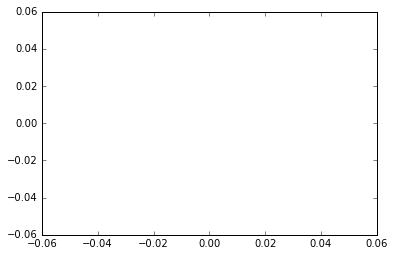

  3%|▎         | 319/10646 [00:29<14:36, 11.78it/s]

KEYBOARD INTERRUPT


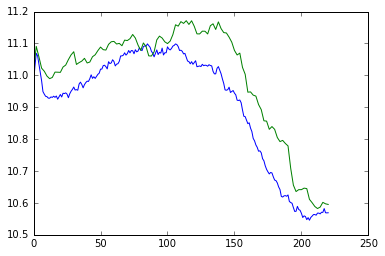

In [44]:
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

# train the model, output generated text after each iteration
try:
    for iteration in range(0, 3):
        print()
        print('-' * 50)
        print('Iteration', iteration)

        for i in tqdm(range(len(sentences) / BATCH_SIZE)):
            X_, y_ = train_iter.next()
            errs.append(model.train_on_batch(X_, y_))

            if i % 2 == 0:
                X_, y_ = val_iter.next()
                val_errs.append(model.evaluate(X_, y_, verbose=False))


            if i % 5000 == 0:
                filepath = "saved_model_%i.keras" %i
                model.save(filepath)
                a = moving_average(errs, n = 100)
                plt.plot(range(len(a)), a)
                a = moving_average(val_errs, n = 100 / 2)
                plt.plot(range(0, len(a) * 2, 2), a)
                plt.show()
                if i > 0 and i % 10000 == 0:
                    lr = float(K.get_value(optimizer.lr))
                    new_lr = lr * 0.7
                    K.set_value(optimizer.lr, new_lr)
                    print("new learning rate : %.5f" %new_lr)

        #model.fit(X, y, batch_size=128, nb_epoch=1)

except KeyboardInterrupt:
    print("KEYBOARD INTERRUPT")
    a = moving_average(errs, n = 100)
    plt.plot(range(len(a)), a)
    a = moving_average(val_errs, n = 100 / 2)
    plt.plot(range(0, len(a) * 2, 2), a)
    plt.show()

In [161]:
filepath = "rapbot_v2.keras"
model.save(filepath)

In [41]:
import keras

model = keras.models.load_model("rapbot_v1.keras")

In [84]:
def score_para(cp):
    return np.mean([rare_ranks.get(w, 0) < 5000 for w in cp.split()])

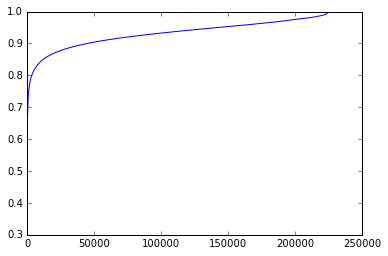

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(cleaned_paras)), [scores[i] for i in sorted_scores])

In [92]:
sorted_scores = np.argsort(scores)

n+=1

print(cleaned_paras[sorted_scores[-n]])
print()
print(cleaned_paras[sorted_scores[n]])

ya know chopper city got all they reasons [lb] you know what i'm saying for doing the things they do [lb] know what i'm saying and imma tell you like this here [lb] if you ain't real know what i'm saying we really ain't [lb] got nothing in common know what i'm saying so its like this

she got that million dollar [lb] million dollar oow , oow [lb] she got that million dollar [lb] million dollar oow , oow [lb] and all i want to do is touch it oow , oow [lb] make her tapout , tapout , tapout , tapout , tapout [lb] and i'm gon make her tapout , tapout , tapout , tapout , tapout


In [85]:
scores = [score_para(cp) for cp in cleaned_paras]

print(cp.replace(" [lb] ", "\n"))

[174739 162688  67804 ..., 183260  98402 222899]
cee - lo
i . . . . have less than an hour
ohhh . . . time will wait baby
i . . . . have less than an hour
ew - ohhh . . . . eww . . . . hmm . .
i'm in the pursuit of my own personal power
and i only have an hour


In [9]:
rare_ranks = dict([(x[0], i) for i, x in enumerate(word_counter.most_common())])

233949

In [95]:
with open('mediocre_rap_lyrics.txt', 'w') as f:
    for i in sorted_scores[:len(sorted_scores) / 5]:
        cp = cleaned_paras[i]
        f.write(cp.replace(' [lb] ','\n'))
        f.write('\n\n')

In [111]:
 for i in range(400):
    x = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(sentence):
        x[0, t, char_indices[char]] = 1.

    preds = model.predict(x, verbose=0)[0]
    next_index = sample(preds, diversity)
    next_char = indices_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

ans
vevectlan
spit rick  top
wriss through the sbadd ax'll
get tick port my sam

KeyboardInterrupt: 

In [25]:
word = 'humm'
print word_counter[word]
print rare_ranks[word]

2
32554


In [27]:
rare_ranks['manhunt']

17390

In [44]:
import tensorflow as tf
from tensorflow.python.framework import ops
import tensorflow as tf
from tensorflow.python.ops.rnn_cell import GRUCell, DropoutWrapper, MultiRNNCell, LSTMCell
from tensorflow.python.ops.rnn import dynamic_rnn, rnn

ops.reset_default_graph()
try:
    sess.close()
except:
    pass
sess = tf.InteractiveSession()

input_data = tf.placeholder(tf.int32, [BATCH_SIZE, NUM_STEPS])
targets = tf.placeholder(tf.int32, [BATCH_SIZE, NUM_STEPS])

NUM_LAYERS = 2
LAYER_SIZE = 1024

keep_prob = tf.placeholder(tf.float32)

initializer = tf.random_uniform_initializer(-0.05,0.05)
with tf.variable_scope("model", reuse=None, initializer=initializer):

    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(LAYER_SIZE, forget_bias=0., state_is_tuple=True)
    lstm_cell = tf.nn.rnn_cell.DropoutWrapper(lstm_cell, output_keep_prob=keep_prob)
    cell = tf.nn.rnn_cell.MultiRNNCell([lstm_cell] * NUM_LAYERS, state_is_tuple=True)

    initial_state = cell.zero_state(BATCH_SIZE, tf.float32)

    with tf.device("/cpu:0"):
        embedding = tf.get_variable(
          "embedding", [MAX_RANK + 3, 128], dtype=tf.float32)
        inputs = tf.nn.embedding_lookup(embedding, input_data)
    #inputs = tf.nn.dropout(inputs, keep_prob)

    outputs = []
    state = initial_state
    with tf.variable_scope("RNN"):
        for time_step in range(NUM_STEPS):
            if time_step > 0: 
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(inputs[:, time_step, :], state)
            outputs.append(cell_output)

    output = tf.reshape(tf.concat(1, outputs), [-1, LAYER_SIZE])
    softmax_w = tf.get_variable(
        "softmax_w", [LAYER_SIZE, MAX_RANK + 3], dtype=tf.float32)
    softmax_b = tf.get_variable("softmax_b", [MAX_RANK + 3], dtype=tf.float32)
    logits = tf.matmul(output, softmax_w) + softmax_b
    output_unflattened = tf.reshape(logits, [-1, NUM_STEPS, MAX_RANK + 3])

loss = tf.nn.seq2seq.sequence_loss_by_example(
    [logits],
    [tf.reshape(targets, [-1])],
    [tf.ones([BATCH_SIZE * NUM_STEPS], dtype=tf.float32)])
cost = tf.reduce_sum(loss) / BATCH_SIZE
final_state = state


learning_rate =  tf.placeholder(tf.float32, shape=[])
tvars = tf.trainable_variables()
grads, _ = tf.clip_by_global_norm(tf.gradients(cost, tvars), MAX_GRAD_NORM)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.train.AdamOptimizer(learning_rate=0.05)
train_op = optimizer.apply_gradients(zip(grads, tvars))

saver = tf.train.Saver()

In [45]:
sess.run(tf.initialize_all_variables())

In [46]:
x, y = train_iter.next()
sess.run(cost, feed_dict={input_data:x, targets:y, keep_prob:1.})

297.98532

In [57]:
def run_batch(iter_, lr, train=False):
    x_, y_ = iter_.next()
    
    dp = 0.95 if train else 1.
    #dp = 1.
    
    
    fd = {input_data: x, targets: y, keep_prob : dp}
    
    if train:
        fd[learning_rate] = lr
        err, _  = sess.run([cost, train_op], feed_dict=fd)
        
    else:
        err, = sess.run([cost], feed_dict=fd)
    
    return err

def moving_average(a, n=16) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [54]:
errs =[]
val_errs = []
val_preds = []

count = 0
epoch = 0 

LEARNING_RATE = 1.
MAX_EPOCH = 6
LR_DECAY = 0.8

lr = LEARNING_RATE

100%|██████████| 931/931 [05:38<00:00,  2.72it/s]

STARTING EPOCH 1
Model saved in file: rnn_model_2.ckpt


 32%|███▏      | 299/931 [01:47<03:43,  2.82it/s]


STARTING EPOCH 2
STOPPED BY KEYBOARD INTERRUPT


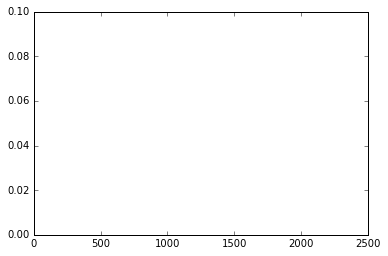

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline

n_epochs = 100

epoch_len = train_iter.epoch_length
try:
    while epoch < n_epochs:
        print "STARTING EPOCH %i" %epoch
        for index in tqdm(range(epoch_len)):
            err = run_batch(train_iter, lr, train=True)
            errs.append(err)
            
            if count % 2 == 0:
                err = run_batch(val_iter, lr, train=False)
                val_errs.append(err)
                #val_preds.append(pred)
            
            count+=1 
            
        try:
            save_path = saver.save(sess, "rnn_model_%i.ckpt" %(epoch + 1))
            print("Model saved in file: %s" % save_path)
        except ValueError:
            print "couldn't save?"
        epoch += 1
        
        if epoch % 5 == 0:
            a = moving_average(errs, n = 1000)
            plt.plot(range(len(a)), a)
            a = moving_average(val_errs, n = 1000 / 2)
            plt.plot(range(0, len(a) * 2, 2), a)
            plt.show()
            
        if epoch > MAX_EPOCH:
            lr *= LR_DECAY
                    
except KeyboardInterrupt:
    print "STOPPED BY KEYBOARD INTERRUPT"
    a = moving_average(errs, n = 100)
    plt.plot(range(len(a)), a)
    plt.ylim((0, 0.1))
    a = moving_average(val_errs, n = 100 / 2)
    plt.plot(range(0, len(a) * 2, 2), a)
    plt.show()

In [306]:
lr /= 100

In [51]:
plt.plot?

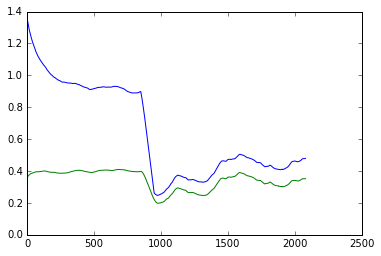

In [59]:
a = moving_average(errs, n = 100) / BATCH_SIZE
plt.plot(range(len(a)), a, color = 'blue')
#plt.ylim((0, 0.1))
a = moving_average(val_errs, n = 100 / 2) / BATCH_SIZE
plt.plot(range(0, len(a) * 2, 2), a, color = 'green')
plt.show()

In [60]:
tf.concat(1, outputs).get_shape()

TensorShape([Dimension(100), Dimension(35840)])

In [62]:
x_, y_ = train_iter.next()
    
dp = 1.

fd = {input_data: x_, targets: y_, keep_prob : dp}

y_pred = sess.run(output_unflattened, feed_dict=fd)

In [63]:
rare_ranks_reversed = dict([(v , k ) for k, v in rare_ranks.items()])
def convert_to_words(vs):
    out = []
    for v in vs:
        if v == MAX_RANK:
            out.append('\n')
        elif v == MAX_RANK + 1:
            out.append('\n\n')
        elif v == MAX_RANK + 2:
            out.append('[UNK]')
        else:
            out.append(rare_ranks_reversed[v])
    return " ".join(out)

convert_to_words(x_[0])

u"blue like [UNK] \n cause i'm a [UNK] - millionaire who still using [UNK] \n or country grammar we gon [UNK] in south atlanta \n jesus was a [UNK] so we're proud about [UNK] them"

In [64]:
for i, y__ in enumerate(y_pred.argsort(axis=2)[0]):
    print y__[y_[0, i]]

304
0
16
338
1580
4535
317
1332
990
1332
197
585
35
0
3850
2936
1089
2826
2258
5002
3315
4168
2666
5000
3499
386
534
7
2407
3335
3255
1118
0
473
3858


In [65]:
print y_pred.argsort(axis=2)[0].shape #[:, y_[0][0]]

(35, 5003)


In [237]:
np.argsort?

In [66]:
print y_[0][:100]
print y_pred[0][:100]

[  15 5002 5000   48   11    4 5002   14 4525   85   95 2382 5002 5000   65
 1317 4066   20  153 5002    8  554 2056 5000  807   43    4 5002   29  354
 1508   89 5002   66 3038]
[[ 18.13204575  20.38354301  12.16783047 ...,  21.36763763  13.08810806
   18.6849041 ]
 [ 19.79428291  19.78723526  18.48643684 ...,  18.12086296  10.04360485
   18.30866432]
 [ 25.82476616  23.99901962  21.24538612 ...,  25.73745346  17.43304062
   23.38027763]
 ..., 
 [ 23.79860306  19.86543465  19.30244827 ...,  22.19552612  16.2310009
   21.6450634 ]
 [ 24.81319046  22.38414764  18.65096474 ...,  25.23698044  16.35422134
   22.98103905]
 [ 23.46815491  18.80275726  19.22898293 ...,  23.38434219  13.37697983
   21.40683746]]


In [67]:
print convert_to_words(y_[0])
print "-" * 20
print convert_to_words(y_pred.argmax(axis=2)[0])

like [UNK] 
 cause i'm a [UNK] - millionaire who still using [UNK] 
 or country grammar we gon [UNK] in south atlanta 
 jesus was a [UNK] so we're proud about [UNK] them hammers
--------------------
sayin , , i out the lot 
 
 [UNK] from 
 out sign my [UNK] mine kids promised [UNK] , sign , rode [UNK] back [UNK] my 
 
 [UNK] 
 , sign ,


In [92]:
np.argmax(y_pred, axis=2)

ValueError: axis(=2) out of bounds

In [164]:
print x_[0]

[  163 10000    11     1  3053    16    85  1252    11    28     1  1643
  1272 10000  2727     1  1424   933    21   168   396 10002   210 10000
  1234  1644     7 10002  6446 10000    85   199  2349    50     1]


In [161]:
s = "519'''"
re.sub("(^|\s)'+", " ", s)

"519'''"

In [167]:
from stemming.porter2 import stem
print stem('')

In [188]:
stem_dict = {}

def stem_word(w):
    if w in stem_dict:
        return stem_dict[w]
    s = stem(w)
    
    i = 0
    
    for i, pair in enumerate(zip(s, w)):
        c1, c2 = pair
        
        if c1 != c2:
            return s, w[i:]
    out = (s, w[i + 1:])    
    stem_dict[w] = out
    return out
        
stem_word("precision")

('precis', 'ion')

In [172]:
counter = Counter()

endings = set()

for w in word_counter:
    try:
        s, t = stem_word(parse_text(w))
    except:
        print w
        continue
    if t.startswith("'"):
        print w
        break
    counter[t] += 1


'


Counter({u'': 91040, u's': 20821, u'e': 16023, u'y': 7322, u'es': 6797, u'ed': 6510, u'ing': 5240, u'er': 2175, u'l': 1988, u'ic': 1294, u'ers': 1145, u'al': 1009, u'ion': 950, u'ly': 932, u'ate': 871, u'ys': 849, u'ous': 724, u'ation': 705, u'ness': 627, u'd': 562, u'able': 556, u'ated': 551, u'ings': 440, u'ions': 439, u'ics': 405, u'ent': 405, u'ive': 341, u'ating': 333, u'ity': 322, u'ize': 309, u'ical': 295, u'ations': 261, u'ant': 260, u'ized': 243, u'als': 239, u'ence': 238, u'ates': 237, u'ator': 220, u'ally': 209, u'ment': 204, u'ls': 201, u'ance': 198, u'ful': 197, u'ically': 183, u'ism': 161, u'ped': 159, u'ely': 156, u'ted': 131, u'ying': 127, u'ping': 117, u'ting': 116, u'ators': 109, u'izing': 101, u'ement': 99, u'ities': 97, u'ents': 95, u'ible': 95, u'ered': 92, u'led': 90, u'ments': 83, u'ged': 81, u'ling': 81, u'ously': 80, u'eds': 79, u'ants': 79, u'ging': 76, u'fully': 75, u'ional': 69, u'ably': 69, u'ative': 68, u'ively': 67, u'eness': 64, u'ning': 62, u'eable': 59

In [204]:
word_counter["breakdancin"]

19

In [118]:
def stem_word(word):
    stemmed

'su'

In [230]:
process_word_dict = {}

word_counter = Counter()

for text in tqdm(cleaned_paras):
    txt = parse_text(text)
    
    for line in txt.split("\n"):
        words = line.split()
        for word in words:
            if word in process_word_dict:
                s, t = process_word_dict[word]
            else:
                s, t = stem_word(parse_text(word))
                process_word_dict[word] = (s, t)
            #s = stem(word)
            word_counter[s] += 1

100%|██████████| 216187/216187 [02:02<00:00, 1762.06it/s]


In [232]:
common_words = set([x[0] for x in word_counter.most_common(20000)])

In [234]:
float(sum([x[1] for x in word_counter.most_common(20000)])) / sum(word_counter.values())

0.9904302715153888

In [70]:
print len(word_counter)
word_counter["askjdhfaadfabs"]
print len(word_counter)

289075
289075


In [180]:
common_words = set([x[0] for x in word_counter.most_common(n)])

In [235]:
word_counter["pointer"]

55

In [77]:
def attempt_split(word):
    out = None
    max_score = 0
    for i in range(1, len(word)):
        w1 = word[:i]
        w2 = word[i:]
        if w1 in common_words and w2 in common_words:
            score = word_counter[w1] + word_counter[w2]
        
            if score > max_score:
                out = "%s %s" %(w1, w2)
                
    return out

attempt_split("bailinin")

'bailin in'

In [112]:
for word, count in word_counter.most_common():
    if "izz" in word:
        print word, count

dizzy 628
bizzy 411
swizz 314
pizza 258
blizzard 182
krizz 164
sizzle 141
grizzly 130
fizzy 112
drizzy 110
shizzle 110
glizzy 105
fizz 84
sizzla 68
gizzle 65
fizzle 62
nizzle 60
drizzle 54
sizzlin 54
dizzle 53
izzy 51
sizzurp 50
bizz 45
twizzy 44
jizzle 43
thizzle 43
sizzling 41
grizzy 38
wizzle 36
thizz 36
swizzz 34
bizzle 34
wizzy 32
grizzle 31
jizz 31
dizzee 28
swizzy 27
hizzle 27
izz 27
izzo 26
rizzle 26
kizzy 25
blizzards 24
gizzy 22
lizzy 22
pizzle 21
pizzas 21
frizzy 21
krizzle 20
trizzy 20
blizz 20
slizzard 19
sizzler 19
pizzazz 19
bizzare 18
bizzack 18
trizz 17
rizzla 17
lizzie 16
sizzles 16
glizzies 15
wizzes 15
rizzo 15
tizzy 14
stizzy 14
rizzy 14
gizzards 14
pizzeria 13
swizzle 13
blizzy 12
gizzard 12
dizzie 12
drizzlin 11
gizzo 11
dizzay 11
izza 10
kizzle 10
mizzy 10
izzle 10
bizzalls 10
hizzy 9
dizzo 9
dizziness 9
izzay 9
twizzie 8
damizza 8
grizzlies 8
whizz 8
sizz 8
sizzerp 8
mizzle 8
drizzling 8
grizz 8
wizz 8
fizzin 8
wizzard 8
chizz 8
bizzay 8
dizzier 7
radizzo 7
twi

In [237]:
len(common_words)

20000

In [241]:
indices = np.random.permutation(range(len(cleaned_paras)))

stemmed_out = open("cleaned_rap.txt", "w")

for i in tqdm(indices):
    text = cleaned_paras[i]
    txt = parse_text(text)
    
    lines = txt.split("\n")
    start_idx = 0
    
    if "[" in lines[0] and "]" in lines[0] or len(lines) < 20:
        start_idx = 1
    
    for line in lines[start_idx:]:
        stemmed_out.write(line + "\n")
#         split = line.split()
#         if len(split) == 1:
#             continue
#         to_file = []
#         for w in split:
#             s, r = stem_word(w)
#             if s in common_words:
#                 to_file.append(s)
#             else:
#                 to_file.append("[UNK]")
#             if r!= "":
#                 to_file.append("[%s]"%r)
#         s_out = " ".join(to_file) + "\n"
#         stemmed_out.write(s_out)
    stemmed_out.write("\n")

100%|██████████| 216187/216187 [01:09<00:00, 3090.24it/s]


In [225]:
line_lengths = []

for i in tqdm(indices):
    text = cleaned_paras[i]
    txt = parse_text(text)
    
    lines = txt.split("\n")
    start_idx = 0
    
    if "[" in lines[0] and "]" in lines[0] or len(lines) < 20:
        start_idx = 1
    
    for line in lines[start_idx:]:
        line_lengths.append(len(line))

100%|██████████| 216187/216187 [01:11<00:00, 3027.10it/s]


In [226]:
np.mean(line_lengths)

45.429201322323053